**Import Libraries**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as lt
import seaborn as sns


**Import Dataset**

In [59]:
df = pd.read_csv('Salary_prediction_dataset.csv')

In [60]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**Dataset Information**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [62]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Check Nullity and Duplicacy**

In [63]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [64]:
df.duplicated().sum()

np.int64(52)

Drop Unnecessary Columns

In [65]:
df.drop(columns = ['fnlwgt'], inplace = True)

Strip Whitespaces

In [66]:
df.replace("?", np.nan, inplace=True)

In [67]:
for col in df.select_dtypes(include = 'object').columns:
  df[col] = df[col].str.strip()

Handle Missing Values

In [68]:
for col in ['workclass', 'occupation', 'native-country']:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"{col} filled with mode: {mode_val}")

workclass filled with mode: Private
occupation filled with mode: Prof-specialty
native-country filled with mode: United-States


/tmp/ipython-input-68-3672866379.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


Binary Encoding

In [69]:
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})


One Hot Encoding

In [70]:
features_to_encode = [col for col in df.select_dtypes(include='object').columns if col != 'income']
df_encoded = pd.get_dummies(df, columns=features_to_encode, drop_first=True)
joblib.dump(df_encoded.drop('income', axis=1).columns, 'full_columns.pkl')


['full_columns.pkl']

In [71]:
print("\nFinal shape:", df_encoded.shape)
print("Target distribution:\n", df_encoded['income'].value_counts())


Final shape: (48842, 97)
Target distribution:
 income
0    37155
1    11687
Name: count, dtype: int64


In [72]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [73]:
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [75]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train distribution:\n", y_train.value_counts())


X_train_scaled shape: (39073, 96)
X_test_scaled shape: (9769, 96)
y_train distribution:
 income
0    29724
1     9349
Name: count, dtype: int64


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Model Training

In [78]:

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [79]:
y_pred = rf_model.predict(X_test_scaled)


Evaluate

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8511618384686253
Precision: 0.7203389830508474
Recall: 0.6180496150556031
F1 Score: 0.6652854511970534


Confusion Matrix

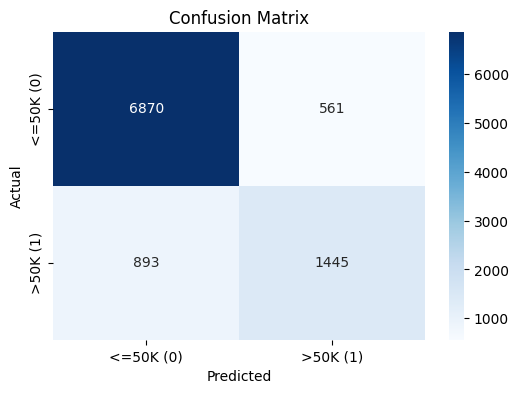

In [81]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K (0)', '>50K (1)'],
            yticklabels=['<=50K (0)', '>50K (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


HyperParameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [83]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [84]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)



Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [85]:
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score: 0.6759606717036796


In [86]:
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Test Precision:", precision_score(y_test, y_pred_best))
print("Test Recall:", recall_score(y_test, y_pred_best))
print("Test F1 Score:", f1_score(y_test, y_pred_best))


Test Accuracy: 0.8657999795270754
Test Precision: 0.7822979659153381
Test Recall: 0.6086398631308811
Test F1 Score: 0.684628337743565


Model Saving

In [87]:
import joblib
joblib.dump(best_rf, 'income_rf_model.pkl')

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']